<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Copy_List_with_Random_Pointer_(Medium).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copy List with Random Pointer

A linked list of length n is given such that each node contains an additional random pointer, which could point to any node in the list, or null.

Construct a deep copy of the list. The deep copy should consist of exactly n brand new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes X and Y in the original list, where X.random --> Y, then for the corresponding two nodes x and y in the copied list, x.random --> y.

Return the head of the copied linked list.

The linked list is represented in the input/output as a list of n nodes. Each node is represented as a pair of [val, random_index] where:

val: an integer representing Node.val
random_index: the index of the node (range from 0 to n-1) that the random pointer points to, or null if it does not point to any node.
Your code will only be given the head of the original linked list.

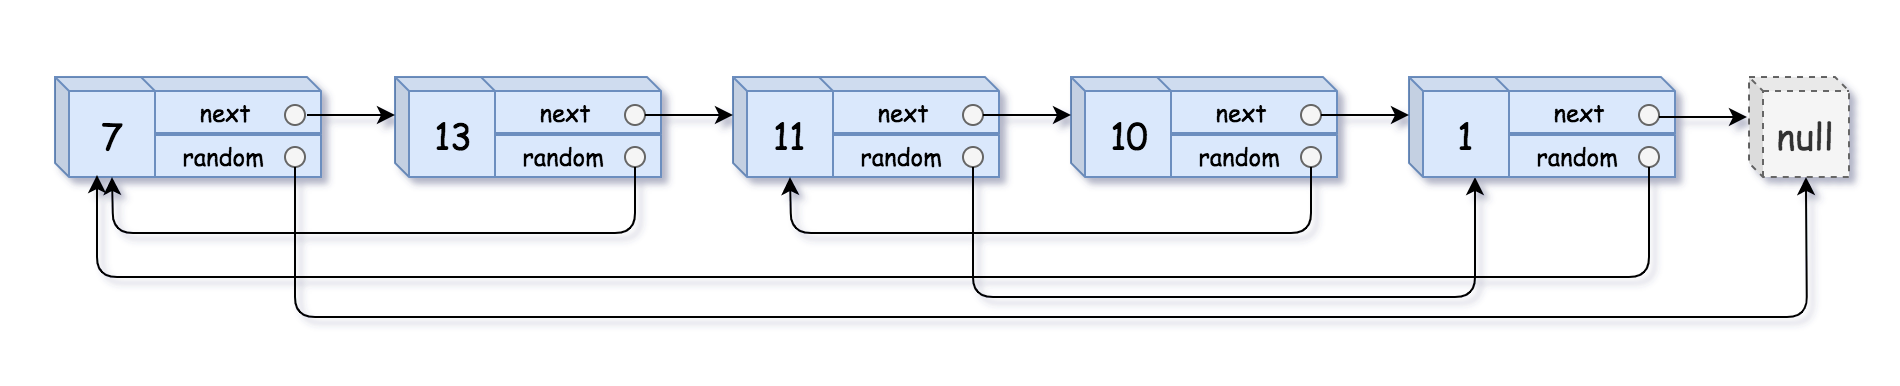

```
Input: head = [[7,null],[13,0],[11,4],[10,2],[1,0]]
Output: [[7,null],[13,0],[11,4],[10,2],[1,0]]
```



# Solution 1: recursively

In [1]:
# Definition for a Node.
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random

In [2]:
class Solution:
    
    def copyRandomList(self, head):
        return self.copyRandomList_helper(head, {})
    
    def copyRandomList_helper(self, node, visited):
        if node == None:
            return None
        
        if node in visited:
            return visited[node]

        new_node = Node(node.val, None, None)
        
        visited[node] = new_node
        
        new_node.next = self.copyRandomList_helper(node.next, visited)
        new_node.random = self.copyRandomList_helper(node.random, visited)
        
        return new_node



```
input : [[7,null],[13,0],[11,4],[10,2],[1,0]]
output : [[7,null],[13,0],[11,4],[10,2],[1,0]]
```



In [3]:
def create_linked_list(array):
  array_node = []
  for element in array:
    array_node.append(Node(element[0], None, None))
  
  head = array_node[0]
  node = head
  for idx in range(len(array_node)):
    if idx < len(array_node) - 1:
      node.next = array_node[idx + 1]
    if array[idx][1] != None:
      node.random = array_node[array[idx][1]]
    node = node.next
  
  return head

In [4]:
head = create_linked_list([[7, None],[13,0],[11,4],[10,2],[1,0]])
head = Solution().copyRandomList(head)
print(head.val, head.next.val)

7 13


# Solution 2: Iteratively

In [5]:
class Solution:
    
    def copyRandomList(self, head):
        if head == None:
            return head
        
        old_node = head
        new_node = Node(old_node.val, None, None)
        
        visited = {}
        visited[old_node] = new_node
        
        while old_node != None:
            new_node.random = self.get_copied_node(old_node.random, visited)
            new_node.next = self.get_copied_node(old_node.next, visited)
            
            old_node = old_node.next
            new_node = new_node.next
            
        return visited[head]
    
    def get_copied_node(self, node, visited):
        if node == None:
            return None
        elif node in visited:
            return visited[node]
        else:
            visited[node] = Node(node.val, None, None)
            return visited[node]

In [6]:
head = create_linked_list([[7, None],[13,0],[11,4],[10,2],[1,0]])
head = Solution().copyRandomList(head)
print(head.val, head.next.val)
print(head.random, head.next.random.val)

7 13
None 7


# Solution 3: iterative with lower constant factor in space complexity

In [7]:
# Time: O(N)
# Space: O(N) with smaller constant factor than solution 1, 2, 4
# if we do not count extra space from output. Space cpmplexity is O(1)

class Solution:
    def copyRandomList(self, head):
        if head == None:
            return None
        # head = A -> B -> C
        old_node = head
        while old_node != None:
            new_node = Node(old_node.val, old_node.next, None)
            old_node.next = new_node
            old_node = new_node.next
        # head = A -> A' -> B -> B' -> C -> C'
        
        old_node = head
        while old_node != None:
            new_node = old_node.next
            new_node.random = old_node.random.next if old_node.random != None else None
            old_node = old_node.next.next
        # head = A -> A' -> B -> B' -> C -> C'
        # complete A'.random = A.randon.next
            
        old_node = head
        new_node = head.next
        new_head = new_node
        while old_node != None:
            old_node.next = old_node.next.next
            new_node.next = new_node.next.next if new_node.next != None else None
            
            old_node = old_node.next
            new_node = new_node.next
        # head = A -> B -> C
        # new_head = A' -> B' -> C'
        
        return new_head

In [8]:
head = create_linked_list([[7, None],[13,0],[11,4],[10,2],[1,0]])
head = Solution().copyRandomList(head)
print(head.val, head.next.val)
print(head.random, head.next.random.val)

7 13
None 7


In [9]:
head = Solution().copyRandomList(None)
print(head)

None


# Solution 4: iterative but cleaner

In [10]:
# Time: O(N)
# Space: O(N)

class Solution:
    def copyRandomList(self, head):
      hash_table = {}
      hash_table[None] = None
      node = head
      while node != None:
        hash_table[node] = Node(node.val, None, None)
        node = node.next

      node = head
      while node != None:
        hash_table[node].next = hash_table[node.next]
        hash_table[node].random = hash_table[node.random]
        node = node.next
      
      return hash_table[head]

In [11]:
head = create_linked_list([[7, None],[13,0],[11,4],[10,2],[1,0]])
head = Solution().copyRandomList(head)
print(head.val, head.next.val)
print(head.random, head.next.random.val)

7 13
None 7


In [12]:
head = Solution().copyRandomList(None)
print(head)

None
